<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-2.csv',
 'data_multi_delta_0_n30-2.csv',
 'data_multi_delta_0_n60-2.csv',
 'data_multi_delta_0_n120-2.csv',
 'data_multi_delta_0_n250-2.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-2.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317282,20.413646,30.365082,-0.274650,125.821360,126.042417,-0.221057
1,0.0,1.0,32.692753,82.090735,30.819132,-0.627014,154.975606,155.394481,-0.418875
2,0.0,2.0,21.597433,38.839911,44.659629,-1.108506,113.988467,114.954973,-0.966505
3,0.0,3.0,90.380421,34.474420,85.951872,-0.308401,220.498311,220.967421,-0.469109
4,0.0,4.0,93.954354,38.886118,50.204802,0.474283,193.519558,193.101334,0.418223
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.863430,89.534973,97.971712,-1.355955,280.014160,281.209839,-1.195679
249996,999.0,246.0,28.030716,97.428337,83.738356,-0.154005,219.043404,219.106955,-0.063550
249997,999.0,247.0,37.149555,85.065599,22.132379,-0.710790,153.636743,154.128518,-0.491775
249998,999.0,248.0,56.567833,79.908480,69.182904,0.834932,216.494149,215.542162,0.951988


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317282,20.413646,30.365082,-0.274650,125.821360,126.042417,-0.221057
1,0.0,1.0,32.692753,82.090735,30.819132,-0.627014,154.975606,155.394481,-0.418875
2,0.0,2.0,21.597433,38.839911,44.659629,-1.108506,113.988467,114.954973,-0.966505
3,0.0,3.0,90.380421,34.474420,85.951872,-0.308401,220.498311,220.967421,-0.469109
4,0.0,4.0,93.954354,38.886118,50.204802,0.474283,193.519558,193.101334,0.418223
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.863430,89.534973,97.971712,-1.355955,280.014160,281.209839,-1.195679
249996,999.0,246.0,28.030716,97.428337,83.738356,-0.154005,219.043404,219.106955,-0.063550
249997,999.0,247.0,37.149555,85.065599,22.132379,-0.710790,153.636743,154.128518,-0.491775
249998,999.0,248.0,56.567833,79.908480,69.182904,0.834932,216.494149,215.542162,0.951988


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317282,20.413646,30.365082,-0.274650,125.821360,126.042417,-0.221057
1,0.0,1.0,32.692753,82.090735,30.819132,-0.627014,154.975606,155.394481,-0.418875
2,0.0,2.0,21.597433,38.839911,44.659629,-1.108506,113.988467,114.954973,-0.966505
3,0.0,3.0,90.380421,34.474420,85.951872,-0.308401,220.498311,220.967421,-0.469109
4,0.0,4.0,93.954354,38.886118,50.204802,0.474283,193.519558,193.101334,0.418223
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.863430,89.534973,97.971712,-1.355955,280.014160,281.209839,-1.195679
249996,999.0,246.0,28.030716,97.428337,83.738356,-0.154005,219.043404,219.106955,-0.063550
249997,999.0,247.0,37.149555,85.065599,22.132379,-0.710790,153.636743,154.128518,-0.491775
249998,999.0,248.0,56.567833,79.908480,69.182904,0.834932,216.494149,215.542162,0.951988


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317282  20.413646  30.365082  ...  125.821360  126.042417 -0.221057
      1.0    32.692753  82.090735  30.819132  ...  154.975606  155.394481 -0.418875
      2.0    21.597433  38.839911  44.659629  ...  113.988467  114.954973 -0.966505
      3.0    90.380421  34.474420  85.951872  ...  220.498311  220.967421 -0.469109
      4.0    93.954354  38.886118  50.204802  ...  193.519558  193.101334  0.418223
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  83.863430  89.534973  97.971712  ...  280.014160  281.209839 -1.195679
      246.0  28.030716  97.428337  83.738356  ...  219.043404  219.106955 -0.063550
      247.0  37.149555  85.065599  22.132379  ...  153.636743  154.128518 -0.491775
      248.0  56.567833  79.908480  69.182904  ...  216.494149  215.542162  0.951988
      249.0  68.407890  78.159097  23.473481  ...  179.893012  179.776993  0.116019

[250000 rows x 7 columns]

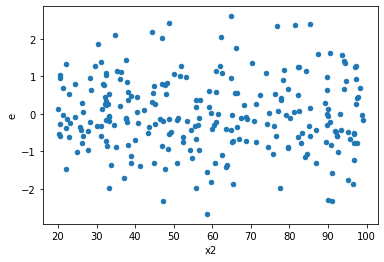

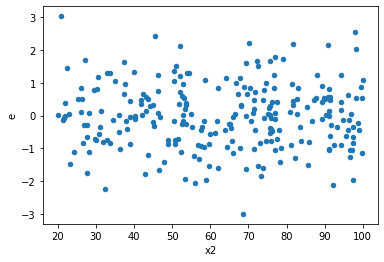

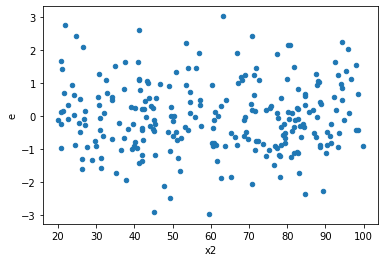

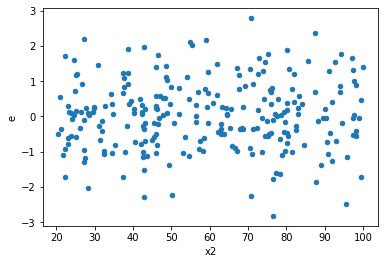

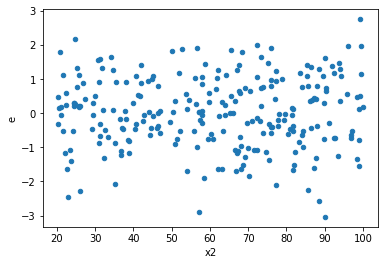

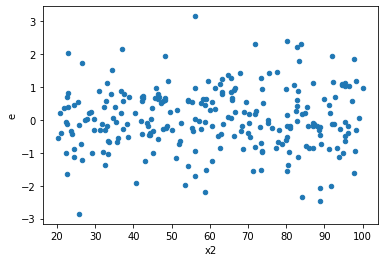

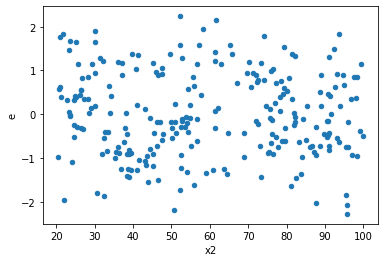

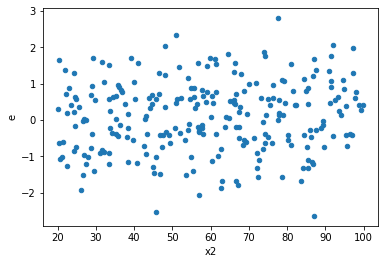

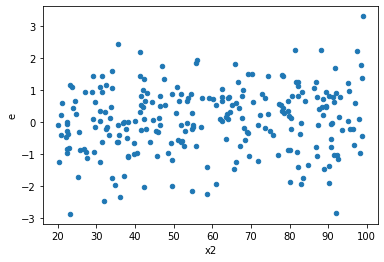

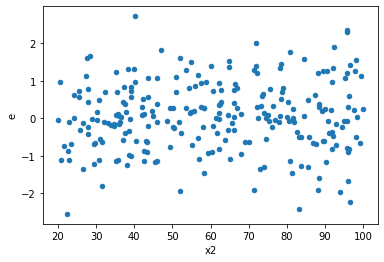

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,77.0284145799018,95.3563335407921,0.7941073668031114,0.9830549849566195,1.237937117891459,0.29491233969192643,0.8525438301540368,0.14745616984596321,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,91.58002244323747,91.74295729590465,0.9441239427137883,0.9458036834629345,1.0017791527925008,0.9930337623605368,0.5034831188197316,0.4965168811802684,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,103.55832461722086,103.57902338507294,1.0676115939919677,1.0678249833512674,1.0001998754607955,0.9992167639902867,0.5003916180048567,0.49960838199514335,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,79.54812409786908,111.30798721444128,0.8200837535862792,1.1475050228292916,1.399253451627566,0.09972181514388545,0.9501390924280573,0.049860907571942725,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,86.37471678094016,118.14583493241946,0.8904609977416511,1.2179982982723656,1.3678289126209913,0.12469455424657427,0.9376527228767129,0.06234727712328714,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,67.6042335874283,102.42490677809361,0.6969508617260649,1.055926874000965,1.5150664587541538,0.042013650183784446,0.9789931749081078,0.021006825091892223,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,90.56415643863923,92.47501152300794,0.9336510973055591,0.9533506342578137,1.0210994631818096,0.918315166767945,0.5408424166160275,0.4591575833839725,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,101.96230651242477,109.31214721240774,1.0511577990971626,1.1269293527052344,1.072083899936957,0.7324676281093221,0.633766185945339,0.36623381405466104,Reject001=1 : Homoscedasticity
9.0,97.0,97.0,67.46915978344187,96.04773575609993,0.6955583482829059,0.990182842846391,1.423579840987908,0.08358698722610614,0.9582065063869469,0.04179349361305307,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,77.0284145799018,95.3563335407921,0.7941073668031114,0.9830549849566195,1.237937117891459,0.29491233969192643,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,91.58002244323747,91.74295729590465,0.9441239427137883,0.9458036834629345,1.0017791527925008,0.9930337623605368,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,103.55832461722086,103.57902338507294,1.0676115939919677,1.0678249833512674,1.0001998754607955,0.9992167639902867,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,79.54812409786908,111.30798721444128,0.8200837535862792,1.1475050228292916,1.399253451627566,0.09972181514388545,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,86.37471678094016,118.14583493241946,0.8904609977416511,1.2179982982723656,1.3678289126209913,0.12469455424657427,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,67.6042335874283,102.42490677809361,0.6969508617260649,1.055926874000965,1.5150664587541538,0.042013650183784446,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,85.13261897220765,73.27446588885658,0.8776558656928624,0.755406864833573,0.8607096407168882,0.4614815043566482,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,90.56415643863923,92.47501152300794,0.9336510973055591,0.9533506342578137,1.0210994631818096,0.918315166767945,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,101.96230651242477,109.31214721240774,1.0511577990971626,1.1269293527052344,1.072083899936957,0.7324676281093221,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64